In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer,ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import KBinsDiscretizer,MinMaxScaler,OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score 
from sklearn.impute import SimpleImputer,KNNImputer
import warnings
warnings.filterwarnings('ignore')

- The following sklearn models were used:

    - Logistic Regression
    - Decision Tree
    - RandomForest
    - VotingClassifier
    
- General ML steps were applied in this project, which contains following steps:

    - Define goal.
    - Import data.
    - Split data to train and test.
    - Exploring data.
    - Feature engineering.
    - Fit Model.
    - Train Model.
    - Cross Validation.
    - Check on Confusion Matrix.
    - Ensemble the models to get a better score.
    - Test model on test data.


# Step 1  define goal
 
 Train a classifier to predict survials in titanic. 
 kaggle link https://www.kaggle.com/c/titanic

# Step 2 read data

In [2]:
df = pd.read_csv('data/train.csv')
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df['fare']=round(df['fare'],0)

# Step 3 train and test data split

In [3]:
y = df['survived']
X = df.loc[:,df.columns!='survived']

In [4]:
X.shape, y.shape

((891, 11), (891,))

In [5]:
X.head()

,passengerid,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.0,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.0,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,8.0,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.0,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0,NaN,S


In [6]:
y = df['survived']
X = df.loc[:,df.columns!='survived']

In [7]:
X_train, X_test, y_train, y_test, = train_test_split(X,y,random_state=42, test_size = 0.2)
X_test.shape, X_train.shape, y_test.shape, y_train.shape

((179, 11), (712, 11), (179,), (712,))

# Step 4 explore the data

In [8]:
df_train = pd.concat([X_train,y_train], axis = 1)
df_train.head(2)

,passengerid,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
331,332,1,"Partner, Mr. Austen",male,45.5,0,0,113043,28.0,C124,S,0
733,734,2,"Berriman, Mr. William John",male,23.0,0,0,28425,13.0,NaN,S,0


<AxesSubplot:>

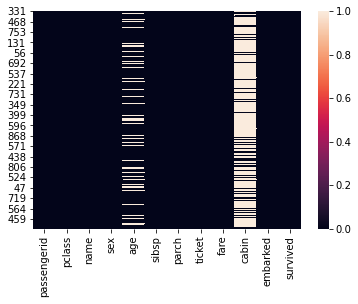

In [9]:
'''check on the non values'''
sns.heatmap(df_train.isnull())

In [10]:
'''looking into corralations'''
df_train.corr()

,passengerid,pclass,age,sibsp,parch,fare,survived
passengerid,1.000000,-0.046175,0.032565,-0.069226,-0.000217,0.025548,0.019979
pclass,-0.046175,1.000000,-0.355950,0.086933,0.012679,-0.546899,-0.321750
age,0.032565,-0.355950,1.000000,-0.320916,-0.207040,0.088256,-0.059695
sibsp,-0.069226,0.086933,-0.320916,1.000000,0.440355,0.153342,-0.047602
parch,-0.000217,0.012679,-0.207040,0.440355,1.000000,0.222036,0.078311
fare,0.025548,-0.546899,0.088256,0.153342,0.222036,1.000000,0.246347
survived,0.019979,-0.321750,-0.059695,-0.047602,0.078311,0.246347,1.000000


<AxesSubplot:>

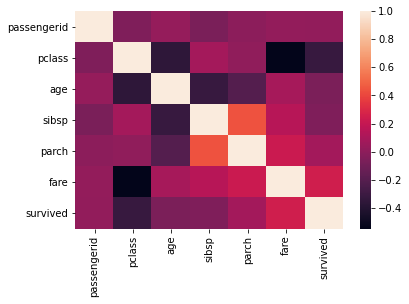

In [11]:
sns.heatmap(df_train.corr())

In [12]:
#sns.pairplot(df_train_feature_eng, hue='survived')

<AxesSubplot:xlabel='survived'>

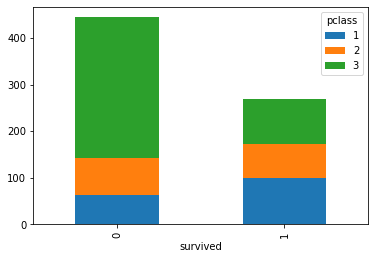

In [13]:
'''how does the survried people distribute in different classes.'''
Survived_Pclass=df_train['pclass'].groupby(df_train['survived'])
Survived_Pclass.value_counts().unstack().plot(kind='bar', stacked = True)

<AxesSubplot:xlabel='survived'>

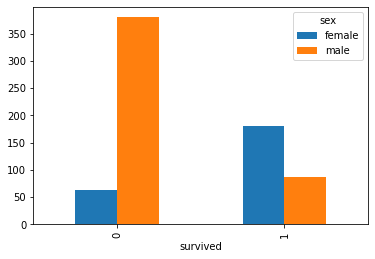

In [14]:
'''sex and survrivals'''
df_train.groupby('survived')['sex'].value_counts().unstack().plot(kind = 'bar', stacked = False)

In [15]:
'''fillna with mean.'''
df_train['age'].fillna(df_train['age'].mean(), inplace=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 331 to 102
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  712 non-null    int64  
 1   pclass       712 non-null    int64  
 2   name         712 non-null    object 
 3   sex          712 non-null    object 
 4   age          712 non-null    float64
 5   sibsp        712 non-null    int64  
 6   parch        712 non-null    int64  
 7   ticket       712 non-null    object 
 8   fare         712 non-null    float64
 9   cabin        159 non-null    object 
 10  embarked     710 non-null    object 
 11  survived     712 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 92.3+ KB


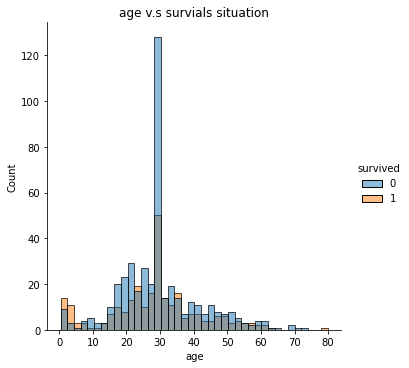

In [16]:
'''age lower than 10 has better chance to survived.''' 
sns.displot(data=df_train, x='age' ,bins= 40, hue='survived')
plt.title('age v.s survials situation')
plt.show()

- execrise for cross table , recource is from internet(chinese website)

Text(0.5, 1.0, 'age info')

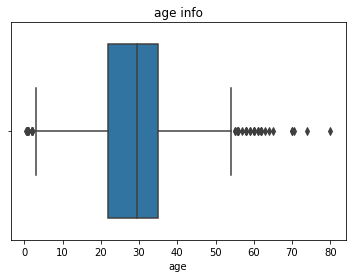

In [17]:
'''what is the age situation among all the pensengers?'''
sns.boxplot(data=df_train,x='age')
plt.title('age info')

In [18]:
train_age=pd.cut(df_train['age'], bins = [0, 5, 15,20,25,30,35,60,100])

- NOTES 

use `cut` when need to segment and sort data values into bins. 


This function is also useful for going from a continuous variable to a
categorical variable. For example, `cut` could convert ages to groups of
age ranges. Supports binning into an equal number of bins, or a
pre-specified array of bins.

In [19]:
age_table = pd.DataFrame(df_train['survived'].values, train_age, columns=['survived'])  # tried to use df_train.'survived', df_train['survived'], but these two does not return and save the value. 

- NOTES

`pd.crosstab`



Compute a simple cross tabulation of two (or more) factors. By default
computes a frequency table of the factors unless an array of values and an
aggregation function are passed.

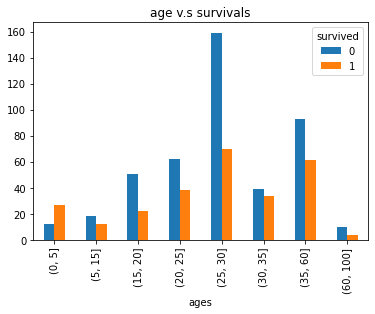

In [20]:
train_age_crosstab = pd.crosstab(age_table.index, age_table['survived'],rownames=['ages'])
train_age_crosstab.plot(kind='bar')
plt.title('age v.s survivals')
plt.show()

<AxesSubplot:xlabel='survived'>

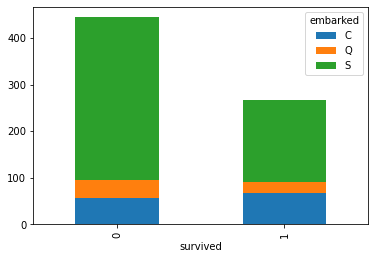

In [21]:
# look into correlation between embarked and survived
df_train.groupby('survived')['embarked'].value_counts().unstack().plot(kind='bar', stacked= True)

<AxesSubplot:xlabel='embarked'>

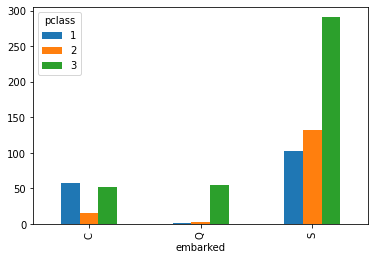

In [22]:
df_train.groupby('embarked')['pclass'].value_counts().unstack().plot(kind = 'bar') # i do not see much relations here.

# Step 5 feature engineering

In [23]:
'''
since kids have more chance to live, manually creating a new feature
1. select title from column name.
2. fillna
3. If it is miss - value 1, not  - value 0
'''
import numpy as np
import re  
def get_title(name):
    '''1. select title from column name.'''
    title = re.search(r', ([A-Za-z]+)\.',name)
    if title:
        return title.group(1)
    else:
        return np.nan

In [24]:
X_test['name'].apply(get_title).unique()

array(['Master', 'Mr', 'Miss', 'Rev', 'Don', 'Mrs', 'Jonkheer', 'Dr',
       'Sir'], dtype=object)

In [25]:
X_train['name'].apply(get_title).unique()

array(['Mr', 'Miss', 'Major', 'Mrs', 'Master', 'Rev', 'Dr', 'Col', 'Mlle',
       'Capt', 'Mme', 'Ms', nan, 'Lady'], dtype=object)

In [26]:
def new_feature(df):
    df['title'] = df['name'].apply(get_title)
    #df['title'].replace('nan','mrs', inplace = True)
    df['title'].replace(['Mr', 'Miss', 'Major', 'Mrs', 'Master', 'Rev', 'Dr', 'Col', 'Mlle',
       'Capt', 'Mme', 'Ms','Lady','Master', 'Mr', 'Miss', 'Rev', 'Don', 'Jonkheer',
       'Sir'],int(0), inplace = True)
    df['title'].replace(['','Miss',np.nan], int(1), inplace = True)
    df.rename(columns={'title':'converted_age'},inplace=True)
    return df

In [27]:
df_train = new_feature(df_train)

In [28]:
X_test = new_feature(X_test)

In [31]:
df_train['converted_age'].unique()

array([0., 1.])

In [30]:
#df_train.drop('converted_age', axis=1, inplace=True)
#X_test.drop('converted_age', axis=1, inplace=True)

In [32]:
X_train.head()

,passengerid,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
331,332,1,"Partner, Mr. Austen",male,45.5,0,0,113043,28.0,C124,S
733,734,2,"Berriman, Mr. William John",male,23.0,0,0,28425,13.0,NaN,S
382,383,3,"Tikkanen, Mr. Juho",male,32.0,0,0,STON/O 2. 3101293,8.0,NaN,S
704,705,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,350025,8.0,NaN,S
813,814,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.0,NaN,S


In [33]:
X_train = df_train.loc[:,df_train.columns != 'survived']
y_train = df_train['survived']
X_train.shape, y_train.shape

((712, 12), (712,))

In [34]:
X_test.head()

,passengerid,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,converted_age
709,710,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.0,NaN,C,0
439,440,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.0,NaN,S,0
840,841,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,8.0,NaN,S,0
720,721,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0,NaN,S,0
39,40,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.0,NaN,C,0


In [40]:
#X_train.fillna(0,inplace=True)

In [35]:
'''
simple imputer returns error, which is imputer contains NaN.
Define customized imputer with np.random.choice().
'''
def cus_imputer(df,col):
    df[col].fillna(np.random.choice(df[col].unique()),axis = 0, inplace=True)
    return df[col].str[0]
X_train['cabin']= cus_imputer(X_train, 'cabin')
X_train['embarked']=cus_imputer(X_train,'embarked')
X_test['cabin']=cus_imputer(X_test, 'cabin')
X_test['embarked']=cus_imputer(X_test, 'embarked')

In [36]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 331 to 102
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   passengerid    712 non-null    int64  
 1   pclass         712 non-null    int64  
 2   name           712 non-null    object 
 3   sex            712 non-null    object 
 4   age            712 non-null    float64
 5   sibsp          712 non-null    int64  
 6   parch          712 non-null    int64  
 7   ticket         712 non-null    object 
 8   fare           712 non-null    float64
 9   cabin          712 non-null    object 
 10  embarked       712 non-null    object 
 11  converted_age  712 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 72.3+ KB


In [37]:
X_train.head()

,passengerid,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,converted_age
331,332,1,"Partner, Mr. Austen",male,45.5,0,0,113043,28.0,C,S,0.0
733,734,2,"Berriman, Mr. William John",male,23.0,0,0,28425,13.0,F,S,0.0
382,383,3,"Tikkanen, Mr. Juho",male,32.0,0,0,STON/O 2. 3101293,8.0,F,S,0.0
704,705,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,350025,8.0,F,S,0.0
813,814,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.0,F,S,0.0


In [38]:
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.preprocessing import MinMaxScaler
transformer = make_column_transformer(#(SimpleImputer(missing_values=np.nan,strategy='most_frequent',),['pclass', 'sibsp', 'parch', 'fare']),
                                      (KNNImputer(n_neighbors=2, weights="uniform"),['pclass','fare','sibsp', 'parch']),    
                                      (OneHotEncoder(sparse=False),['pclass','sex','cabin','embarked']),
                                      (StandardScaler(),['fare']),
                                      ('passthrough',['converted_age'])
                              )

In [39]:
transformer.fit(X_train[['pclass', 'sibsp', 'fare','parch','cabin','embarked','sex','converted_age']]) 

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('knnimputer',
                                 KNNImputer(add_indicator=False, copy=True,
                                            metric='nan_euclidean',
                                            missing_values=nan, n_neighbors=2,
                                            weights='uniform'),
                                 ['pclass', 'fare', 'sibsp', 'parch']),
                                ('onehotencoder',
                                 OneHotEncoder(categories='auto', drop=None,
                                               dtype=<class 'numpy.float64'>,
                                               handle_unknown='error',
                                               sparse=False),
                                 ['pclass', 'sex', 'cabin', 'embarked']),
                                ('standardscaler',
                

In [40]:
X_train_trans=transformer.transform(X_train[['pclass', 'sibsp', 'parch','fare', 'cabin','embarked','sex','converted_age']])

In [41]:
X_train_trans.shape

(712, 22)

In [42]:
X_test_trans = transformer.transform(X_test[['pclass', 'sibsp', 'parch', 'fare','cabin','embarked','sex','converted_age']])

In [43]:
X_test_trans.shape

(179, 22)

# Step 6 Fit model on the transformed training data

`Model 1` 
- RandomForest

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
rf = RandomForestClassifier()

In [54]:
rf.fit(X_train_trans, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [55]:
rf.feature_importances_

array([4.26430638e-02, 1.49340181e-01, 6.15398544e-02, 6.55988722e-02,
       1.12546907e-02, 1.34761589e-02, 4.06187067e-02, 1.93045626e-01,
       1.45558890e-01, 3.27149279e-03, 7.97874748e-03, 8.59764397e-03,
       6.11131200e-03, 1.15263459e-02, 3.20851615e-02, 1.60835609e-03,
       5.33229620e-04, 1.86269458e-02, 8.93682208e-03, 2.24713295e-02,
       1.55168792e-01, 7.77762681e-06])

In [56]:
round(rf.score(X_train_trans,y_train),2)

0.92

In [57]:
round((cross_val_score(rf,X_train_trans, y_train,cv=10)).mean(),2)

0.8

In [58]:
from sklearn.metrics import classification_report
y_pred_train_rt = rf.predict(X_train_trans)

In [60]:
print('random_tree')
print('\n')
print(classification_report(y_train, y_pred_train_rt))

random_tree


              precision    recall  f1-score   support

           0       0.91      0.97      0.94       444
           1       0.94      0.84      0.89       268

    accuracy                           0.92       712
   macro avg       0.92      0.90      0.91       712
weighted avg       0.92      0.92      0.92       712



`Model 2` 
- Decisiontree

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
dt=DecisionTreeClassifier()
dt.fit(X_train_trans, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [63]:
round(dt.score(X_train_trans, y_train),2)

0.92

In [64]:
round(np.mean(cross_val_score(dt,X_train_trans, y_train,cv=10)),2)

0.79

In [65]:
y_pred_train_dt = dt.predict(X_train_trans)
print('decision_tree')
print('\n')
print(classification_report(y_train, y_pred_train_dt))

decision_tree


              precision    recall  f1-score   support

           0       0.90      0.97      0.94       444
           1       0.95      0.83      0.88       268

    accuracy                           0.92       712
   macro avg       0.93      0.90      0.91       712
weighted avg       0.92      0.92      0.92       712



`Model 3` 
- Logistic regression

In [46]:
from sklearn.linear_model import LogisticRegression

In [82]:
lr=LogisticRegression(max_iter=500)

In [83]:
lr.fit(X_train_trans, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [85]:
pred = lr.predict(X_train_trans)

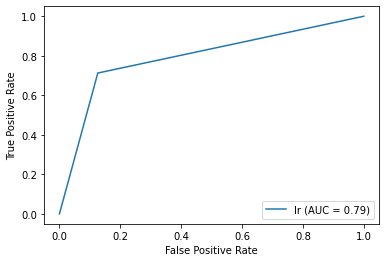

In [86]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='lr')
display.plot()  
plt.show()    

In [77]:
round(lr.score(X_train_trans, y_train),2), round(lr.score(X_test_trans, y_test),2)

(0.81, 0.77)

In [78]:
# cross validation
round(np.mean(cross_val_score(lr,X_train_trans, y_train,cv=10)),20)

0.8006259780907666

In [79]:
y_pred_train_lr = lr.predict(X_train_trans)
print('logistic_regression')
print('\n')
print(classification_report(y_train, y_pred_train_lr))

logistic_regression


              precision    recall  f1-score   support

           0       0.83      0.87      0.85       444
           1       0.77      0.70      0.73       268

    accuracy                           0.81       712
   macro avg       0.80      0.79      0.79       712
weighted avg       0.81      0.81      0.81       712



- `Ensemble models`

In [69]:
from sklearn.ensemble import VotingClassifier

In [70]:
clf1 = RandomForestClassifier(max_depth=50)
clf2 = DecisionTreeClassifier()
clf3 = LogisticRegression(class_weight='balanced',max_iter=600)
eclf = VotingClassifier(estimators=[('rf',clf1),('dt',clf2),('lr',clf3)],voting='hard')
clf1 = clf1.fit(X_train_trans, y_train)
clf2 = clf2.fit(X_train_trans, y_train)
clf3 = clf3.fit(X_train_trans, y_train)
eclf = eclf.fit(X_train_trans, y_train)
round(eclf.score(X_train_trans, y_train),2), round(eclf.score(X_test_trans, y_test),2)

(0.92, 0.45)

-  Alternative way to run mutipl mode at the same time.

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=500, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
train_score: 0.79
test_score: 0.46


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
train_score: 0.92
test_score: 0.48


DecisionTreeClassifier(ccp_alpha=0.0, class_weigh

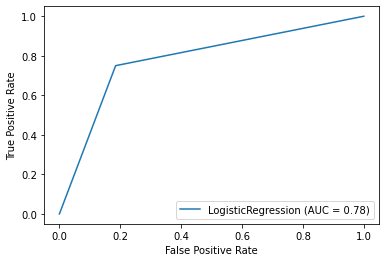

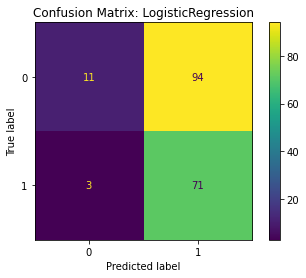

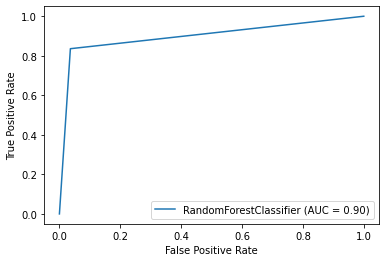

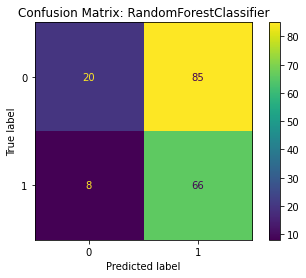

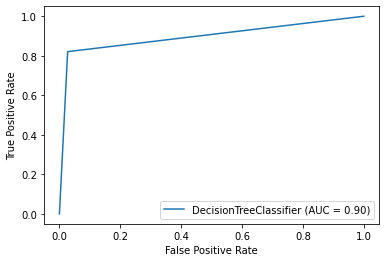

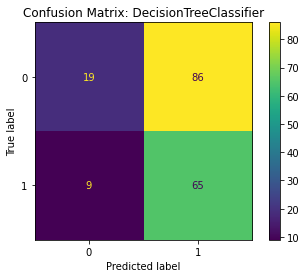

In [91]:

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

names = ['LogisticRegression','RandomForestClassifier', 'DecisionTreeClassifier']
clfs = [LogisticRegression(class_weight='balanced',max_iter=500), RandomForestClassifier(max_depth=50),DecisionTreeClassifier()]
for names , clf in zip(names,clfs):
    clf.fit(X_train_trans, y_train)
    pred = clf.predict(X_train_trans)
    fpr, tpr, thresholds = metrics.roc_curve(y_train, pred)
    roc_auc = metrics.auc(fpr, tpr)
    display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='%s'%(names))
    fig_c = display.plot()
    plt.savefig("fig_curve%s.jpg"%(names))
    fig_m = plot_confusion_matrix(clf, X_test_trans, y_test)
    plt.savefig("fig_matrix%s.jpg"%(names))
    plt.title('Confusion Matrix: %s'%(names))
    print(clf)
    print('train_score:', round(clf.score(X_train_trans, y_train),2))
    test_score = round(clf.score(X_test_trans, y_test),2)
    print('test_score:',test_score)
    print('\n')

- Kaggle test

In [63]:
df_kaggle=pd.read_csv('../data/test.csv')
df_kaggle.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
